In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union
from sklearn.metrics import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from tools import *
import warnings

In [2]:
warnings.warn("ignore")

C:\Users\Admin\AppData\Local\Temp\ipykernel_22292\994036171.py:1: UserWarning: ignore
  warnings.warn("ignore")


In [3]:
data = pd.read_csv("../data/smoking.csv")
data.drop(["ID", "oral"], axis=1, inplace=True)
data.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [4]:
#Compressing hearing and eyesight columns for both ears/eyes into one.
data["eyesight"] = (data["eyesight(left)"] + data["eyesight(right)"])/2.0
data["hearing"] = (data["hearing(left)"] + data["hearing(right)"])/2.0
data.drop(['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'], axis = 1, inplace = True)

In [5]:
oe = OrdinalEncoder()
categorical_cols = data.select_dtypes(include='object').columns.tolist()
data[categorical_cols] = oe.fit_transform(data[data.select_dtypes(include='object').columns.tolist()]) 
oe.categories_

[array(['F', 'M'], dtype=object), array(['N', 'Y'], dtype=object)]

Poprzez to, że nasze zmienne jakościowe są binarne, nie musimy z nimi nic więcej robić

In [6]:
y = data["smoking"].copy()
X = data.drop("smoking", axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Model I

KNN wymaga skalowania danych, ponieważ KNN używa odległości euklidesowej między dwoma punktami danych. Odległość euklidesowa jest wrażliwa na wielkości. Jednak w pierwszym modelu nie dokonamy skalowania, aby uwidocznić jak bardzo skalowanie poprawia nam skuteczność modelu.

In [7]:
knn_I = KNeighborsClassifier(n_jobs=-1)
knn_I.fit(X_train, y_train)
model_I = generate_raport(knn_I, X_train, X_test, y_train, y_test, True)
model_I["Name"]= "Model_I"
model_I

c:\Users\Admin\Envs\Rafal\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Precision,Recall,F1 Score,Accuracy,Roc_auc_score,Name
0,0.607402,0.570768,0.588516,0.70536,0.75832,Model_I


c:\Users\Admin\Envs\Rafal\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


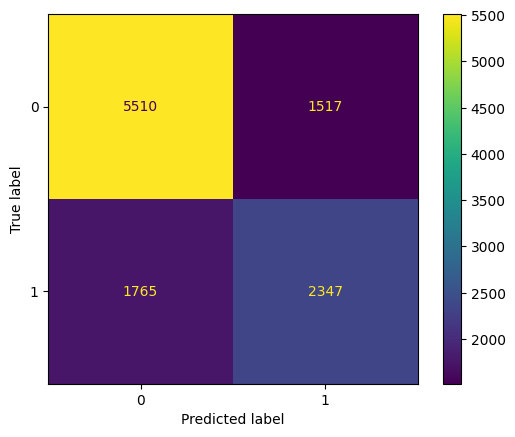

In [8]:
plot_confusion_matrix(knn_I, X_test, y_test)

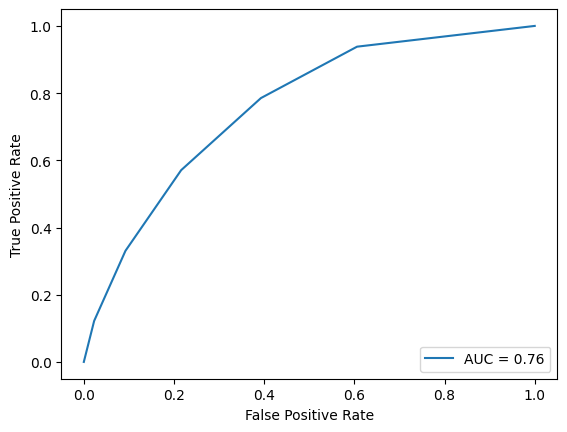

In [9]:
plot_roc_auc(knn_I, X_test, y_test).plot()

## Model II - ze skalowaniem (Standaryzacja)

In [10]:
y = data["smoking"].copy()
X = data.drop("smoking", axis=1).copy()

#Standaryzacja
ss = StandardScaler()
# ss = MinMaxScaler()
X.loc[:,~X.columns.isin(categorical_cols)] = ss.fit_transform(X.loc[:,~X.columns.isin(categorical_cols)])
X.loc[:,~X.columns.isin(categorical_cols)] = ss.fit_transform(X.loc[:,~X.columns.isin(categorical_cols)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [11]:
knn_II = KNeighborsClassifier(n_jobs=-1)
knn_II.fit(X_train, y_train)
model_II = generate_raport(knn_II, X_train, X_test, y_train, y_test, True)
model_II["Name"]= "Model_II"
model_II

c:\Users\Admin\Envs\Rafal\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Precision,Recall,F1 Score,Accuracy,Roc_auc_score,Name
0,0.638091,0.63716,0.637625,0.732651,0.801018,Model_II


c:\Users\Admin\Envs\Rafal\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


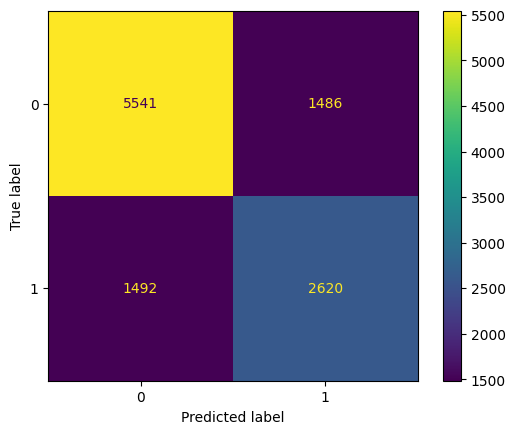

In [12]:
plot_confusion_matrix(knn_II, X_test, y_test)

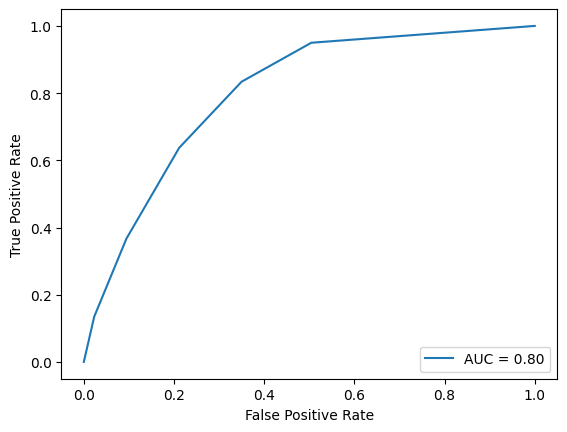

In [13]:
plot_roc_auc(knn_II, X_test, y_test).plot()

## Model III - z normalizacją

In [14]:
y = data["smoking"].copy()
X = data.drop("smoking", axis=1).copy()

#Standaryzacja
# ss = StandardScaler()
ss = MinMaxScaler()
X.loc[:,~X.columns.isin(categorical_cols)] = ss.fit_transform(X.loc[:,~X.columns.isin(categorical_cols)])
X.loc[:,~X.columns.isin(categorical_cols)] = ss.fit_transform(X.loc[:,~X.columns.isin(categorical_cols)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [15]:
knn_III = KNeighborsClassifier(n_jobs=-1)
knn_III.fit(X_train, y_train)
model_III = generate_raport(knn_III, X_train, X_test, y_train, y_test, True)
model_III["Name"]= "Model_III"
model_III

c:\Users\Admin\Envs\Rafal\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Precision,Recall,F1 Score,Accuracy,Roc_auc_score,Name
0,0.649755,0.644698,0.647217,0.740551,0.807807,Model_III


c:\Users\Admin\Envs\Rafal\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


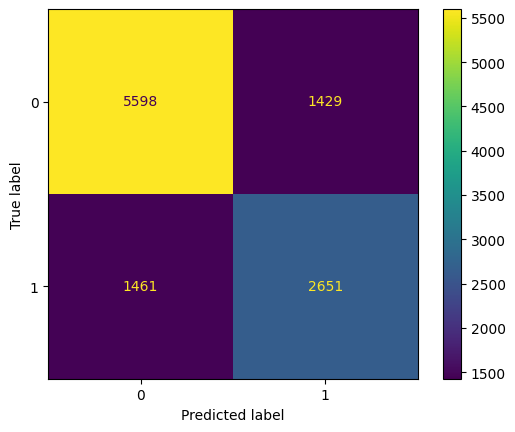

In [16]:
plot_confusion_matrix(knn_III, X_test, y_test)

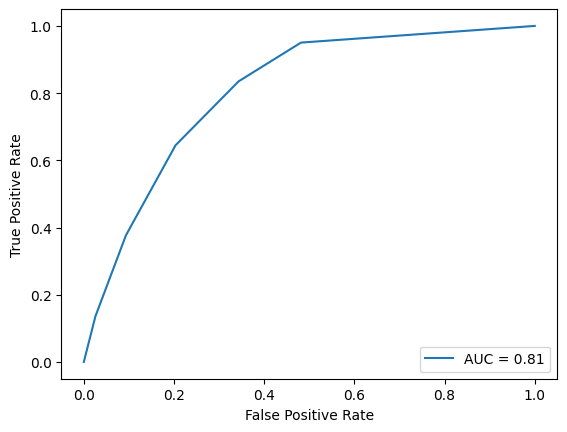

In [17]:
plot_roc_auc(knn_III, X_test, y_test).plot()

## Model IV - większa liczba k

In [18]:
knn_IV = KNeighborsClassifier(n_neighbors=100, n_jobs=-1)
knn_IV.fit(X_train, y_train)
model_IV = generate_raport(knn_IV, X_train, X_test, y_train, y_test, True)
model_IV["Name"]= "Model_IV"
model_IV

c:\Users\Admin\Envs\Rafal\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Precision,Recall,F1 Score,Accuracy,Roc_auc_score,Name
0,0.633729,0.67534,0.653873,0.736062,0.818528,Model_IV


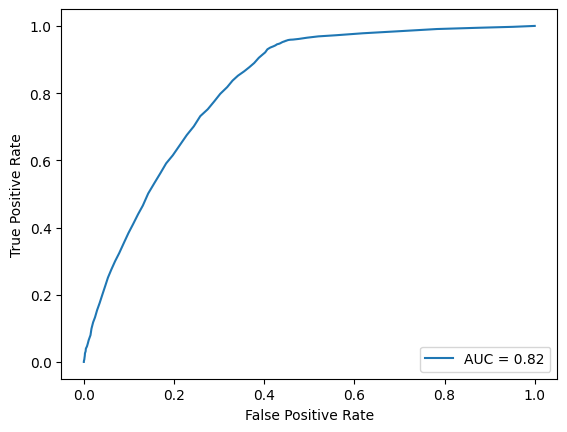

In [19]:
plot_roc_auc(knn_IV, X_test, y_test).plot()

In [20]:
knn_IV.predict_proba(X_test)

array([[0.94, 0.06],
       [0.96, 0.04],
       [0.34, 0.66],
       ...,
       [0.99, 0.01],
       [0.52, 0.48],
       [0.31, 0.69]])

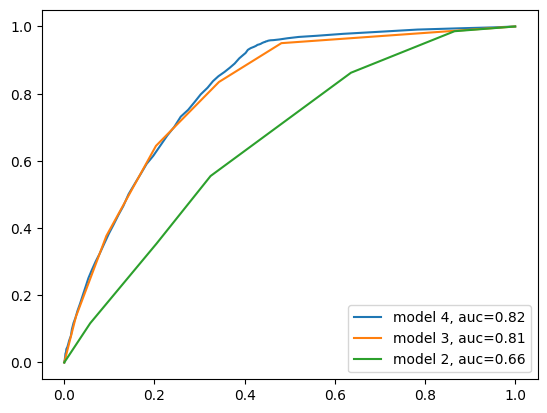

In [24]:
plt.figure(0).clf()

probas = knn_IV.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label=f"model 4, auc={roc_auc:.2f}")

probas = knn_III.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label=f"model 3, auc={roc_auc:.2f}")

probas = knn_II.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label=f"model 2, auc={roc_auc:.2f}")

# probas = knn_I.predict_proba(X_test)
# fpr, tpr, _ = roc_curve(y_test, probas[:,1])
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr,tpr,label=f"model 1, auc={roc_auc:.2f}")

plt.legend(loc=0)

In [25]:
pd.concat([model_I, model_II,model_III,model_IV])

,Precision,Recall,F1 Score,Accuracy,Roc_auc_score,Name
0,0.607402,0.570768,0.588516,0.705360,0.758320,Model_I
0,0.638091,0.637160,0.637625,0.732651,0.801018,Model_II
0,0.649755,0.644698,0.647217,0.740551,0.807807,Model_III
0,0.633729,0.675340,0.653873,0.736062,0.818528,Model_IV
